## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

# 1. Завантаження необхідних бібліотек

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap
import warnings

warnings.filterwarnings('ignore')

# 2. Завантаження та огляд даних

In [8]:
file_path = "bank-additional-full.csv"
df = pd.read_csv(file_path, delimiter=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 3. Проведення Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

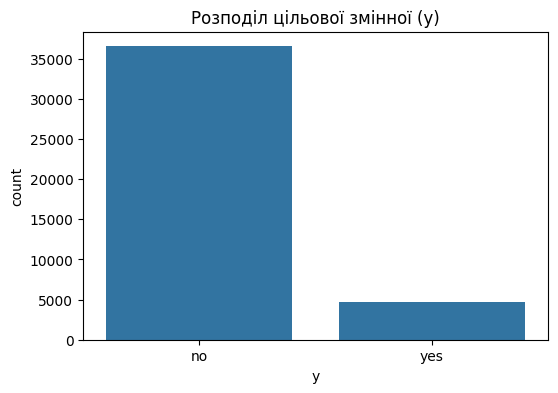

In [9]:
# Огляд типів змінних
df.info()

# Розподіл цільової змінної
plt.figure(figsize=(6, 4))
sns.countplot(x=df["y"])
plt.title("Розподіл цільової змінної (y)")
plt.show()

# 4. Попередня обробка даних

In [10]:
# Розділення на ознаки та цільову змінну
X = df.drop(columns=["y"])
y = df["y"].map({"yes": 1, "no": 0})  # Перетворення y на 0 та 1

# Визначаємо числові та категоріальні змінні
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

# Побудова трансформера для обробки даних
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                  ("scaler", StandardScaler())])
cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                                  ("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Навчання моделей

In [12]:
# Ініціалізація моделей
models = {
    "Logistic Regression": LogisticRegression(),
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Навчання та оцінка моделей
results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results.append([name, accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)])

# Виведення результатів
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-score", "AUC-ROC"])
display(results_df)

,Model,Accuracy,F1-score,AUC-ROC
0,Logistic Regression,0.916606,0.541082,0.706994
1,kNN,0.907623,0.521684,0.706636
2,Decision Tree,0.892450,0.523143,0.731484
3,Gradient Boosting,0.921826,0.609697,0.756033


# 6. Тюнінг гіперпараметрів (Randomized Search)

In [14]:
# Створення пайплайну для Gradient Boosting з Randomized Search
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", GradientBoostingClassifier(random_state=42))])

# Визначення сітки параметрів
param_dist = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 3, 5]
}

# Randomized Search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, scoring="roc_auc", cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Найкращі параметри
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Оцінка найкращої моделі
y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random)
auc_random = roc_auc_score(y_test, y_pred_random)

# Виведення результатів
best_params_random, accuracy_random, f1_random, auc_random

({'classifier__n_estimators': 100,
  'classifier__min_samples_split': 5,
  'classifier__min_samples_leaf': 3,
  'classifier__max_depth': 3,
  'classifier__learning_rate': 0.2},
 0.9232823500849721,
 0.6215568862275449,
 0.7643805427142791)

# 7. Аналіз важливості ознак за допомогою SHAP

 95%|=================== | 7826/8238 [00:11<00:00]       

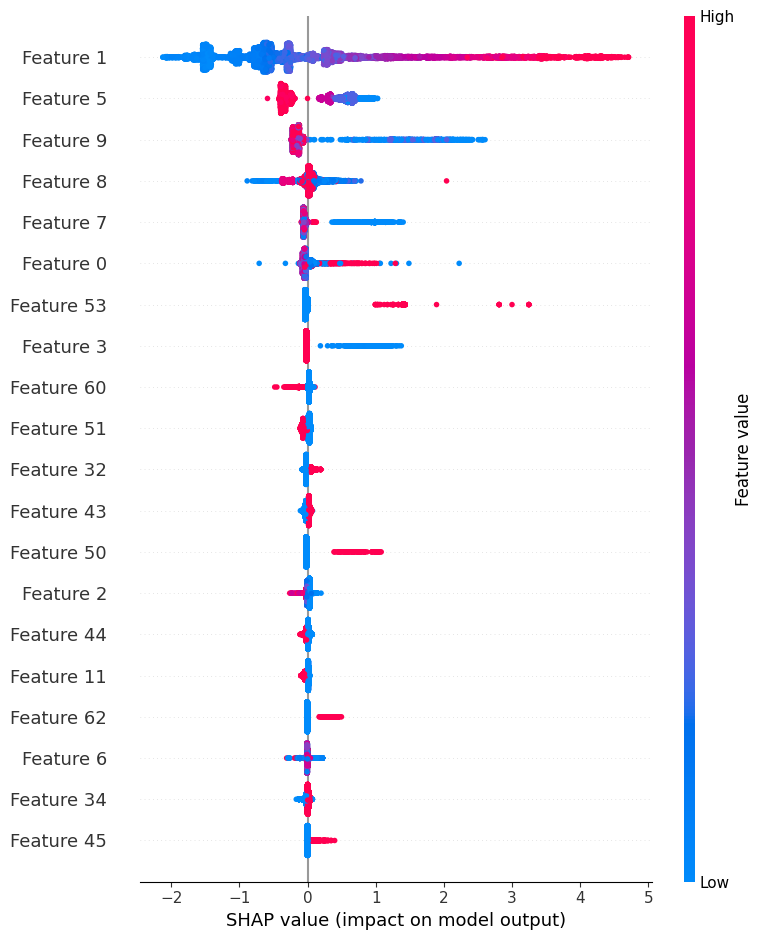

In [15]:
# Використання SHAP для моделі Gradient Boosting
best_model = models["Gradient Boosting"]
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", best_model)])
pipeline.fit(X_train, y_train)

# Трансформування тестових даних
X_test_transformed = preprocessor.transform(X_test)

# Аналіз важливості ознак
explainer = shap.Explainer(best_model, X_test_transformed)
shap_values = explainer(X_test_transformed)

# Відображення важливості ознак
shap.summary_plot(shap_values, X_test_transformed)
